## Analysing the impact of temperature on crop yield 
Done by Nicholas Dale (falconpunch082)

Objective: To determine how temperature impacts crop yield of different crops
            by creating a DataFrame containing relevant columns and then
            creating a scatter plot of temperature vs crop yield for each
            unique crop in the dataset.

In [1]:
# Creating dependencies for setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from pathlib import Path
from scipy.stats import linregress

**Data Synthesis and Cleanup**
- crop_yield.csv has a lot of columns, but does not have an annual temperature column.
- TEMP_ANNUAL_SEASONAL_MEAN.csv contains information of annual temperature of the ENTIERTY of India.
- We will create new DataFrames specially designed to answer the relationship between temperature and crop yield for each crop by taking the columns of 'crop' and 'crop_year' from crop_yield.csv.
- While states are provided, there are no free sources of annual temperature of each Indian state by year. Therefore, one limitation in analysing this data would be the generalisation of temperature when India actually has different climates within its borders.

In [2]:
# Creating file paths for each .csv file
crop_csv = Path("resources/crop_yield.csv")
temp_csv = Path("resources/TEMP_ANNUAL_SEASONAL_MEAN.csv")

# Creating DataFrames from each .csv file
crop = pd.read_csv(crop_csv)
temp = pd.read_csv(temp_csv)

# removing any results from both DataFrames that contain null values
crop.dropna(how='any')
temp.dropna(how='any')

,YEAR,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901.0,25.42,20.11,27.64,28.16,23.1
1,1902.0,25.42,20.88,27.96,27.98,22.51
2,1903.0,25.01,19.99,27.02,28,22.33
3,1904.0,24.93,19.76,27.23,27.57,22.56
4,1905.0,24.84,18.36,26.38,28.2,23.13
...,...,...,...,...,...,...
116,2017.0,26.04,21.37,28.2,28.39,23.84
117,2018.0,25.9,21.24,28.16,28.28,23.55
118,2019.0,25.86,20.71,28,28.6,23.49
119,2020.0,25.78,20.79,27.58,28.45,23.75


In [3]:
# Previewing crop DataFrame
crop.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [4]:
# Previewing temp DataFrame
temp.head()

,YEAR,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901.0,25.42,20.11,27.64,28.16,23.1
1,1902.0,25.42,20.88,27.96,27.98,22.51
2,1903.0,25.01,19.99,27.02,28,22.33
3,1904.0,24.93,19.76,27.23,27.57,22.56
4,1905.0,24.84,18.36,26.38,28.2,23.13


In [5]:
# Picking out relevant columns
crop_cleaned = crop[['Crop', 'Crop_Year', 'Area', 'Production', 'Yield']]
crop_cleaned = crop_cleaned.rename({'Crop_Year': 'Year'}, axis='columns')
crop_cleaned.head()

# Description of variables:
# - Crop: name of crop cultivated
# - Year: year in which crop was grown
# - Area: total land area in hectares under cultivation
# - Production: quantity of crop production in metric tons
# - Yield : production/area

,Crop,Year,Area,Production,Yield
0,Arecanut,1997,73814.0,56708,0.796087
1,Arhar/Tur,1997,6637.0,4685,0.710435
2,Castor seed,1997,796.0,22,0.238333
3,Coconut,1997,19656.0,126905000,5238.051739
4,Cotton(lint),1997,1739.0,794,0.420909


In [6]:
# The plan now is to create multiple DataFrames based on the 5 most produced crops.
# This analysis will thus only focus on rice, maize, moong, ruad and groundnut crops.
crop_cleaned['Crop'].value_counts()

Rice                     1197
Maize                     975
Moong(Green Gram)         740
Urad                      733
Groundnut                 725
Sesamum                   685
Potato                    628
Sugarcane                 605
Wheat                     545
Rapeseed &Mustard         528
Bajra                     524
Jowar                     513
Arhar/Tur                 508
Ragi                      498
Gram                      490
Small millets             485
Cotton(lint)              476
Onion                     454
Sunflower                 441
Dry chillies              419
Other Kharif pulses       382
Horse-gram                371
Peas & beans (Pulses)     369
Tobacco                   364
Other  Rabi pulses        355
Soyabean                  349
Turmeric                  337
Masoor                    324
Ginger                    323
Linseed                   308
Castor seed               300
Barley                    297
Sweet potato              273
Garlic    

In [7]:
# creating DataFrames grouped by crop
warnings.filterwarnings('ignore')

rice = crop_cleaned[crop_cleaned['Crop'] == 'Rice']
maize = crop_cleaned[crop_cleaned['Crop'] == 'Maize']
moong = crop_cleaned[crop_cleaned['Crop'] == 'Moong(Green Gram)']
urad = crop_cleaned[crop_cleaned['Crop'] == 'Urad']
groundnut = crop_cleaned[crop_cleaned['Crop'] == 'Groundnut']

rice = rice.groupby(['Year']).sum().reset_index()
maize = maize.groupby(['Year']).sum().reset_index()
moong = moong.groupby(['Year']).sum().reset_index()
urad = urad.groupby(['Year']).sum().reset_index()
groundnut = groundnut.groupby(['Year']).sum().reset_index()

In [8]:
# Only taking annual temperature
temp_a = temp[['YEAR', 'ANNUAL']]

# Converting temp['YEAR'] into int to match crop_cleaned['Year']
temp_a = temp_a.fillna(value=0)
temp_a['YEAR'] = temp_a['YEAR'].astype(int)

# Renaming temp_a columns
temp_a = temp_a.rename({'YEAR': 'Year','ANNUAL': 'Annual Temp'}, axis='columns')

# Previewing temp DataFrame to see if change has occured
temp_a.head()

,Year,Annual Temp
0,1901,25.42
1,1902,25.42
2,1903,25.01
3,1904,24.93
4,1905,24.84


In [9]:
# Merging created crop DataFrames with temp DataFrame
rice_temp = rice.merge(temp_a, on='Year')
maize_temp = maize.merge(temp_a, on='Year')
moong_temp = moong.merge(temp_a, on='Year')
urad_temp = urad.merge(temp_a, on='Year')
groundnut_temp = groundnut.merge(temp_a, on='Year')

In [10]:
# Creating .csv files of each DataFrame for viewing
rice_temp.to_csv("output/rice_temp.csv")
maize_temp.to_csv("output/maize_temp.csv")
moong_temp.to_csv("output/moong_temp.csv")
urad_temp.to_csv("output/urad_temp.csv")
groundnut_temp.to_csv("output/groundnut_temp.csv")

**Data Visualisation**

In [11]:
# We want to sort our DataFrames in regards to annual temperature in preparation for scatter plot making
rice_temp = rice_temp.sort_values(by='Annual Temp', ascending=True)
maize_temp = maize_temp.sort_values(by='Annual Temp', ascending=True)
moong_temp = moong_temp.sort_values(by='Annual Temp', ascending=True)
urad_temp = urad_temp.sort_values(by='Annual Temp', ascending=True)
groundnut_temp = groundnut_temp.sort_values(by='Annual Temp', ascending=True)

In [12]:
# Define a function to create Linear Regression plots
def lin_reg(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_sq = rvalue ** 2
    
    return regress_values, line_eq, rvalue

The r-value is: 0.4571050696701538


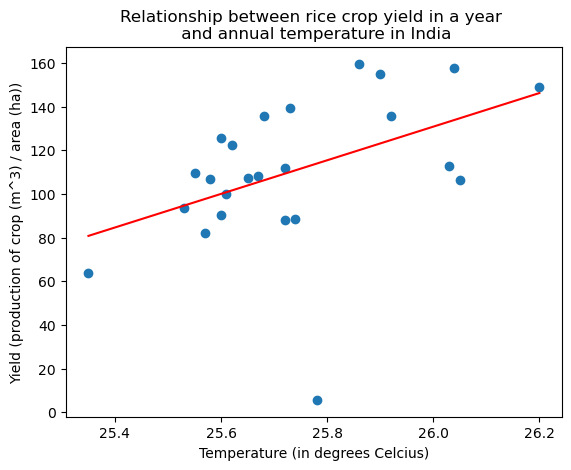

In [13]:
# Rice vs. Temperature visualisation
rice_temp['Annual Temp'] = rice_temp['Annual Temp'].astype('float')
rice_temp['Yield'] = rice_temp['Yield'].astype('float')
regress_values, line_eq, rvalue = lin_reg(rice_temp['Annual Temp'], rice_temp['Yield'])
plt.scatter(rice_temp['Annual Temp'], rice_temp['Yield'])
plt.plot(rice_temp['Annual Temp'], regress_values, "r-")
plt.title("Relationship between rice crop yield in a year \n and annual temperature in India")
plt.xlabel("Temperature (in degrees Celcius)")
plt.ylabel("Yield (production of crop (m^3) / area (ha))")
print(f"The r-value is: {rvalue}")
plt.savefig("output/rice_yield_temp.png")
plt.show()

There is a moderate and positive relationship between rice crop yield and temperature, suggesting that the rice crop yield for the year may tend to increase as the annual temperature increases.

The r-value is: -0.3153068822963966


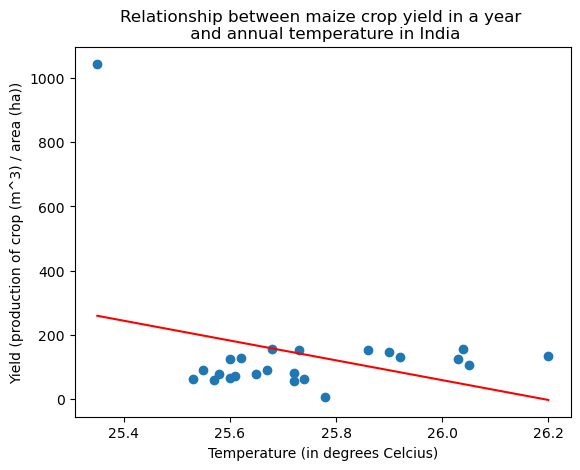

In [14]:
# Maize vs. Temperature visualisation
maize_temp['Annual Temp'] = maize_temp['Annual Temp'].astype('float')
maize_temp['Yield'] = maize_temp['Yield'].astype('float')
regress_values, line_eq, rvalue = lin_reg(maize_temp['Annual Temp'], maize_temp['Yield'])
plt.scatter(maize_temp['Annual Temp'], maize_temp['Yield'])
plt.plot(maize_temp['Annual Temp'], regress_values, "r-")
plt.title("Relationship between maize crop yield in a year \n and annual temperature in India")
plt.xlabel("Temperature (in degrees Celcius)")
plt.ylabel("Yield (production of crop (m^3) / area (ha))")
print(f"The r-value is: {rvalue}")
plt.savefig("output/maize_yield_temp.png")
plt.show()

There is a low and negative relationship between maize crop yield and temperature, suggesting that while annual temperature has a low impact on maize crop yield for an entire year, lower temperatures tend to lower yield.

It should be noted that there is an outlier where a relatively low temperature is associated with an enormous yield which may have impacted the linear regression.

The r-value is: 0.6020658834832703


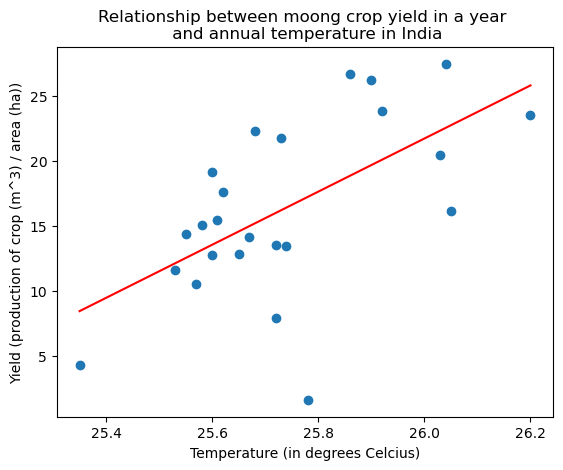

In [15]:
# Moong vs. Temperature visualisation
moong_temp['Annual Temp'] = moong_temp['Annual Temp'].astype('float')
moong_temp['Yield'] = moong_temp['Yield'].astype('float')
regress_values, line_eq, rvalue = lin_reg(moong_temp['Annual Temp'], moong_temp['Yield'])
plt.scatter(moong_temp['Annual Temp'], moong_temp['Yield'])
plt.plot(moong_temp['Annual Temp'], regress_values, "r-")
plt.title("Relationship between moong crop yield in a year \n and annual temperature in India")
plt.xlabel("Temperature (in degrees Celcius)")
plt.ylabel("Yield (production of crop (m^3) / area (ha))")
print(f"The r-value is: {rvalue}")
plt.savefig("output/moong_yield_temp.png")
plt.show()

There is a high and positive relationship between moong crop yield and temperature, suggesting that the moong crop yield for the year is likely to increase as the annual temperature increases.

The r-value is: 0.5728777049416955


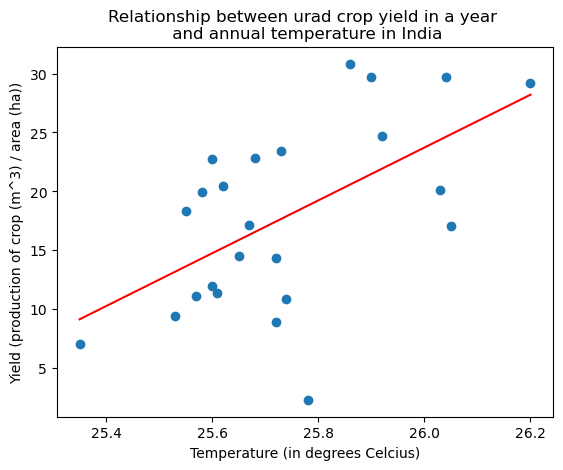

In [16]:
# Urad vs. Temperature visualisation
urad_temp['Annual Temp'] = urad_temp['Annual Temp'].astype('float')
urad_temp['Yield'] = urad_temp['Yield'].astype('float')
regress_values, line_eq, rvalue = lin_reg(urad_temp['Annual Temp'], urad_temp['Yield'])
plt.scatter(urad_temp['Annual Temp'], urad_temp['Yield'])
plt.plot(urad_temp['Annual Temp'], regress_values, "r-")
plt.title("Relationship between urad crop yield in a year \n and annual temperature in India")
plt.xlabel("Temperature (in degrees Celcius)")
plt.ylabel("Yield (production of crop (m^3) / area (ha))")
print(f"The r-value is: {rvalue}")
plt.savefig("output/urad_yield_temp.png")
plt.show()

There is a moderate and positive relationship between urad crop yield and temperature, suggesting that the urad crop yield for the year may tend to increase as the annual temperature increases.

The r-value is: 0.54196214533335


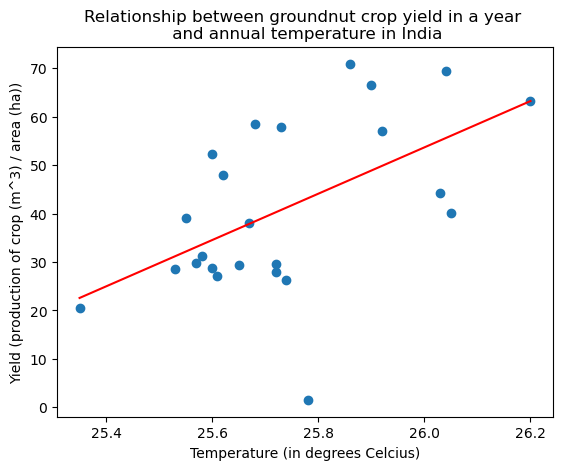

In [17]:
# Groundnut vs. Temperature visualisation
groundnut_temp['Annual Temp'] = groundnut_temp['Annual Temp'].astype('float')
groundnut_temp['Yield'] = groundnut_temp['Yield'].astype('float')
regress_values, line_eq, rvalue = lin_reg(groundnut_temp['Annual Temp'], groundnut_temp['Yield'])
plt.scatter(groundnut_temp['Annual Temp'], groundnut_temp['Yield'])
plt.plot(groundnut_temp['Annual Temp'], regress_values, "r-")
plt.title("Relationship between groundnut crop yield in a year \n and annual temperature in India")
plt.xlabel("Temperature (in degrees Celcius)")
plt.ylabel("Yield (production of crop (m^3) / area (ha))")
print(f"The r-value is: {rvalue}")
plt.savefig("output/groundnut_yield_temp.png")
plt.show()

There is a moderate and positive relationship between groundnut crop yield and temperature, suggesting that the groundnut crop yield for the year may tend to increase as the annual temperature increases.

Data from 2020 should be consider as outliers due to the extremely low yield when compared to other years. This may be related to the 2020-2021 Indian farmer protest and the nation-wide shutdown of agriculture as a form of protest.